# Gaussian Naive Bayes Classifier on Titanic Dataset
This project is one of my Machine Learning mini projects. For this project, we have a [Titanic](https://github.com/richardcsuwandi/my-portfolio/blob/master/ML%20Mini%20Projects/datasets/titanic.csv) dataset that contains the the passengers information like name, age, gender, socio-economic class, etc. The dataset can be found on Kaggle: https://www.kaggle.com/c/titanic/data

The goal of this project is to create a Gaussian Naive Bayes Classifier model to classify whether the passenger survived the Titanic shipwreck or not.

In [20]:
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## Loading the Data

In [21]:
raw_data = pd.read_csv('titanic.csv')
raw_data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
# Overview of the data
raw_data.describe(include='all')

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,891,NaN,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,"Jacobsohn, Mr. Sidney Samuel",NaN,male,NaN,NaN,NaN,1601,NaN,G6,S,NaN
freq,NaN,1,NaN,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,NaN,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,257.353842,NaN,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,NaN,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,NaN,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,NaN,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


As we can see above, some columns might not be useful and our data seems to have some missing values. So, we have to clean our data first

## Preprocessing the Data

### Cleaning The Data
Dropping unnecessary columns and clearing the missing values

In [23]:
# Drop the unnecessary columns
data = raw_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [24]:
# Dealing with missing values
mv = data.isnull().sum()
mv

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [25]:
# Remove all the data that has missing values
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Pclass,Sex,Age,Fare,Survived
count,714.000000,714,714.000000,714.000000,714.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN
freq,NaN,453,NaN,NaN,NaN
mean,2.236695,NaN,29.699118,34.694514,0.406162
std,0.838250,NaN,14.526497,52.918930,0.491460
min,1.000000,NaN,0.420000,0.000000,0.000000
25%,1.000000,NaN,20.125000,8.050000,0.000000
50%,2.000000,NaN,28.000000,15.741700,0.000000
75%,3.000000,NaN,38.000000,33.375000,1.000000


### Creating Dummy Variables
Converts categorical values in the 'Sex' column into numerical values.

In [26]:
data_with_dummies = pd.get_dummies(data_no_mv, drop_first=True)
data_with_dummies.head()

,Pclass,Age,Fare,Survived,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


Notice that we drop the 'Sex_female' column because according to the Dummy Variable Trap theory, one column is enough to represent male or female.

## Exploratory Data Analysis (EDA)
Before we begin fitting a Gaussian Naive Bayes Classifier model on the data, let's try and eyeball it first. Here, we will make some explorations and visualizations to understand the relationship of the target variable with other features.

### Creating a correlation matrix
The correlation matrix is used to measure the linear relationships between the variables.

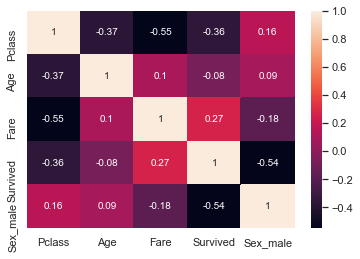

In [27]:
corr_matrix = data_with_dummies.corr().round(2)  # Round to 2 decimal places
sns.heatmap(data=corr_matrix, annot=True)  # Set annot = True to print the values inside the squares
plt.show()

From the correlation matrix above, we can observe that 'Pclass' and 'Fare' have a correlation of -0.55. This suggests that these feature pairs are strongly correlated to each other. Considering multicollinearity, let's drop the 'Fare' column since it has lower correlation with 'Survived' compared to 'Pclass'.

In [28]:
# Drop the 'Fare' column
data_no_multicollinearity = data_with_dummies.drop('Fare', axis=1)
data_no_multicollinearity.head()

,Pclass,Age,Survived,Sex_male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1


### Plotting the distribution
Since our 'Age' column has continuous numeric values, we can plot its distribution.

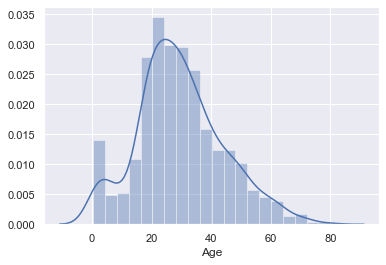

In [29]:
# Plot the distribution of 'Age'
sns.distplot(data_no_multicollinearity['Age'])
plt.show()

From the plot above, it seems that 'Age' has a distribution that is close enough to Gaussian. So, applying the Gaussian Naive Bayes model on the data might be a good idea.

## Building the Model
Finally, we can build our Gaussian Naive Bayes Classifier model from the Titanic dataset.

In [30]:
# Declaring the features and the label
features = data_no_multicollinearity.drop('Survived', axis=1)
label = data_no_multicollinearity['Survived']

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets, in a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

In [32]:
from sklearn.naive_bayes import GaussianNB

# Build and fit the model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predictions and Evaluations

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
# Making predictions
pred = clf.predict(X_test)

In [35]:
# Measuring the accuracy of the model
acc = accuracy_score(y_test, pred)
acc

0.7692307692307693

In [36]:
# Create a Confusion Matrix
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,74,12
Actual 1,21,36


In [37]:
# Create a classification report
print(classification_report(y_test,pred))

precision    recall  f1-score   support

           0       0.78      0.86      0.82        86
           1       0.75      0.63      0.69        57

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.77      0.77      0.77       143

